In [ ]:
"""
Name: Vinayak Gaikwad
Student ID: 300137895
COMP 381 - Summer 2018
Term Project.
"""

In [1]:
"""
The Project consists of using few algorithms learnt in class to make predictions on a data set. 
I will be using a Communities and Crime Dataset taken from the UCI machine learning Repository.
Link: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
The dataset contains data collected from within United States. The data is a combination of data collected from 
various data sources like US census, US LEMAS survey and the crime data from FBI UCR.
I am working on predicting the violent crimes per 100k population.
The dataset is an interesting one. The data is neatly classified based on 
different parameter like, ethnicity, education level, income level, 
number of people in the family, etc. 
This gives a broad range of possibilities to work on.
The models are supervised learning models since we already know the value. 
Aim is to predict those values using different regression algorithms. 
Although not accurate, the goal remains to reduce error as much as possible. 
I am also performing classification using different algorithm and have tried 
to change parameters to make the algorithm as good as possible.


I am using regression algorithms like linear regression, lasso and Gradient boosting.
I am also performing feature selection 
I am considering  classification too.
"""


In [17]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression,SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

%matplotlib inline
plt.style.use('seaborn-white')

In [18]:
# Storing csv data in a variable. 
#Displaying the top 5 rows of the data using the .head() variable. 
df = pd.read_csv('C:/Users/Vinay/PycharmProjects/Project/communities.csv')
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.03


In [5]:
"""
I wont be needing communityname, state and violentcrimesperpop as predictors. 
I am predicting violent crimes per 100k population.
Total data is divided in train and test data. The data is divided in two equal parts. 
Training data is 1000 and test is 994.
"""

X = df.drop(['state','communityname','ViolentCrimesPerPop'], axis=1)
Xtrain = X[0:1000]
Xtest = X[1000:]
y = df['ViolentCrimesPerPop']
ytrain= y[0:1000]
ytest = y[1000:]


In [6]:
#plt.scatter(Xt, yt,color='g')
#print(len(Xt))

#plt.xlim(0,0.16)
#plt.ylim(0,1)
#plt.show()

The MSE using all features is 0.02023605553621239
R-Squared value is 0.6067416981206519


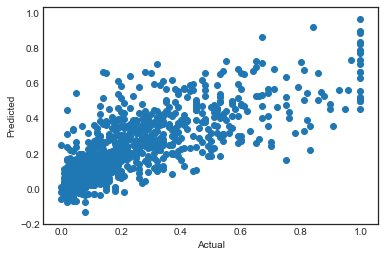

In [7]:
"""
For the start, I will perform simple linear regression on the training data and then test it on the 
training data.
In this piece of code, I am making an object of LinearRegression() and then fit it on the training
data.
Using the predict function I predict it on train and test data. 
As evaluation matrix, I am using R square and MSE.

On running this piece of code, we see the MSE is 0.02024 and R square is 0.6067
Let us run this against a few other models and compare. 
"""

lm = LinearRegression()
lm.fit(Xtrain, ytrain)

preds_train = lm.predict(Xtrain)
preds_test = lm.predict(Xtest)

mse_full = mean_squared_error(ytest, preds_test)
print("The MSE using all features is %s" % mse_full)
rs = r2_score(ytrain, preds_train)
print("R-Squared value is", +rs)

plt.figure()
plt.scatter(ytest, preds_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [8]:
#model = sm.OLS(ytrain,Xtrain).fit()
#print(model.summary())

Total Features:  24
Selected Features:  4


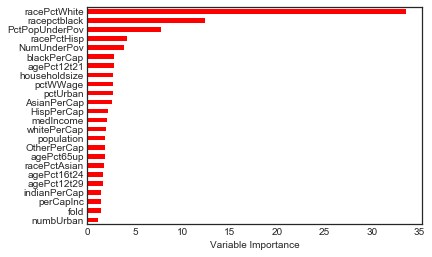

In [8]:
"""
I am doing feature selection here. And then use those features to train other models.
I found a new method ExtraTreesRegressor() which does feature selection. 
It does feature selection. However we dont explicitly specify the number of features or the 
percentage of features. 
"""
# Fit randomized decision tress
etr = ExtraTreesRegressor()
etr = etr.fit(Xtrain, ytrain)
model = SelectFromModel(etr, prefit= True)
XtrainNew = model.transform(Xtrain)
XtestNew = model.transform(Xtest)

importance = pd.DataFrame({'Importance': etr.feature_importances_*100}, index = Xtrain.columns)
importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
print("Total Features: ", len(Xtrain.columns))
print("Selected Features: ", XtrainNew.shape[1])

In [9]:
#X_sub_train = Xtrain[selected_feas]
#X_sub_test = Xtest[selected_feas]
"""
Here, I am performing linear regression with feature selection.
Strangely, the performance deteriorated. MSE increased a bit and so did R squared value.
"""

ln = LinearRegression()
ln.fit(XtrainNew, ytrain)

preds_train = ln.predict(XtrainNew)
preds_test = ln.predict(XtestNew)
mse_sub = mean_squared_error(ytest, preds_test)
print("The MSE using just the selected features is %s" % mse_sub)
rs = r2_score(ytrain, preds_train)
print("R-Squared value is", +rs)

The MSE using just the selected features is 0.023711254343821916
R-Squared value is 0.5250976029551566


KFold(n_splits=10, random_state=None, shuffle=False)
The MSE using cross validation on the entire dataset is 0.02188407541577058


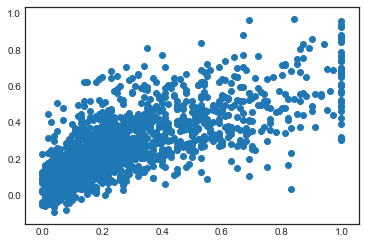

In [10]:
"""
In this case, I am again doing linear regression however with kfolds cross validation.
I am using 10 fold cross validation.
With K-fold the MSE reduced. Although a little bit but it did.
So this seems to be a better model compared to linear regression with all features and even with 
feature selection.
For linear regression this is the the best model.
"""
kf = KFold(n_splits=10)
print (kf)
preds_cv = []
for train, test in kf.split(X):
    X_cv = X.iloc[train]
    y_cv = y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = LinearRegression()
    lm_cv.fit(X_cv, y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

mse_cv = mean_squared_error(y, preds_cv)
print("The MSE using cross validation on the entire dataset is %s" % mse_cv)

plt.figure()
plt.scatter(y, preds_cv)
plt.show()


The MSE using cross validation and the Lasso on the entire dataset is 0.05428390625326126


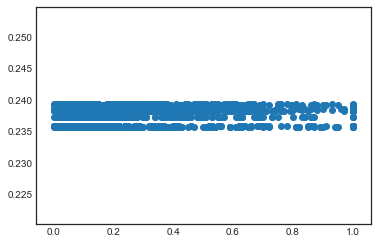

In [11]:
"""
Now I am working on a regularization method. 
Here I am using Kfold cross validation with Lasso. 
Like before I used 10 fold cross validation to calculate the MSE.
The MSE increased from the previous value indicating that the model isn't the best 
for predicting the response accurately.
"""

kf = KFold(n_splits=10)

preds_cv = []

for train, test in kf.split(X):
    X_cv = X.iloc[train]
    y_cv = y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = Lasso(max_iter=5000, tol=0.001)
    lm_cv.fit(X_cv, y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

mse_cv = mean_squared_error(y, preds_cv)
print("The MSE using cross validation and the Lasso on the entire dataset is %s" % mse_cv)

plt.figure()
plt.scatter(y, preds_cv)
plt.show()


Total Features:  24
Selected Features:  5
The MSE using cross validation and the Lasso on the entire dataset is 0.05428390625326126


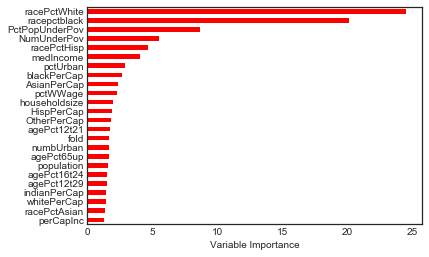

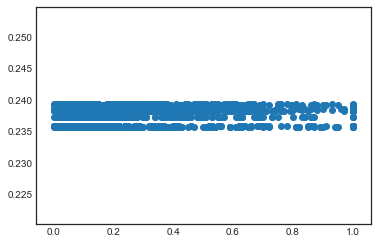

In [13]:
"""
Next, we will work on Lasso but only with selected features. 
Using Feature selection like we did before, I performed lasso again but the results did not
improve. As for the data given, Lasso doesn't seem to be the best model for making 
predictions on this dataset.
"""

etc = ExtraTreesRegressor()
etc = etc.fit(X, y)
model = SelectFromModel(etc, prefit= True)
XtrainNew = model.transform(X)
XtestNew = model.transform(X)

importance = pd.DataFrame({'Importance': etc.feature_importances_*100}, index = X.columns)
importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
print("Total Features: ", len(X.columns))
print("Selected Features: ", XtrainNew.shape[1])

kf = KFold(n_splits=10)

preds_cv = []

for train, test in kf.split(XtrainNew):
    X_cv = X.iloc[train]
    y_cv = y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = Lasso(max_iter=500, tol=0.001)
    lm_cv.fit(X_cv, y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

mse_cv = mean_squared_error(y, preds_cv)
print("The MSE using cross validation and the Lasso on the entire dataset is %s" % mse_cv)

plt.figure()
plt.scatter(y, preds_cv)
plt.show()

In [15]:
"""
Here I will try RandomForestRegressor algorithm. 
We fit the model on training data and then make predictions on test data.
Again, using mean squared error, we check the result.
I changed parameters for max_features and set it to different values.
I got the best result at max_features = 10.  
"""
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(Xtrain, ytrain)

pred = regr2.predict(Xtest)
mean_squared_error(ytest, pred)

0.019821982897384304

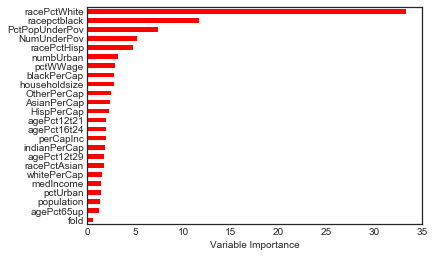

In [16]:
"""
Plotting the important feature as we did before, same features made it to the list of important
features as the last time.
"""
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [28]:
"""


from sklearn import model_selection

models = []
models.append(('LR', lm))
models.append(('Lasso', lm_cv))
models.append(('RandomForest', regr2))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
"""
"""
For regression, I am using GradientBoostingRegressor()
I have fit the model on training data and made predictions on test data.
The MSE dropped by many folds compared to other models.
By tuning max_depth to different values, the lowest MSE was at max_depth = 3.
The MSE is 0.135 which is by far the lowest in comparison to other
regression models that we have seen before.
"""
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=3, random_state=1)
regr.fit(Xtrain, ytrain)
mse = mean_squared_error(ytest, regr.predict(Xtest))
print ("MSE for GradientBoostingRegressor is: ",mse)

preds_train = regr.predict(Xtrain)
rs = r2_score(ytrain, preds_train)
print("R-Squared value for GradientBoostingRegressor is", +rs)


MSE for GradientBoostingRegressor is:  0.1354005335550662
R-Squared value for GradientBoostingRegressor is 0.2711157231799812


In [32]:
"""
I shall experiment with Multi Layer Perceptron here.
It will be classification against all the regression that was done before.
I have classified the response variable(ViolentCrimesPerPop) as "high" for any value above 
greater than 0.4 (values range between 0 and 1).
While performing this classification, I varied the number of hidden layers and max iterations.
I also changed the activation function between relu and tanh and relu seemed to perform better. 
The current setting of 3 hidden layers of size 10 each and activation = relu performs the best.
Making a confusion matrix did not give great results.
The accuracy was high a 0.8114.
The precision was 0.15, recall was 0.02 and f_score was 0.031.
None of them indicate that the model is good. It basically gives no interpretation of the
response as far of classification is concerned. 
Finally, area under the curve is only 0.50... which is definitely not a great value.
To sum it all, this is not the best model for classification.
"""

df['High'] = df.ViolentCrimesPerPop.map(lambda x: 1 if x > 0.40 else 0)
 
X = df[['medIncome', 'perCapInc']]
y = df.High                                    
nn = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000, activation='relu', random_state=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.5, random_state=1)
nn.fit(Xtrain, ytrain)
preds_nn = nn.predict(Xtest)
cm_nn = pd.DataFrame(confusion_matrix(ytest, preds_nn).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Neural Network:\n")
print(cm_nn)

tree_acc = accuracy_score(ytest, preds_nn)
print('\nAccuracy is: %s' % tree_acc)   

print(precision_recall_fscore_support(ytest, preds_nn, average='binary'))

auc = roc_auc_score(ytest,preds_nn)
print("Area under the curve is ",auc)

C:\Users\Vinay\PycharmProjects\Labs\venv\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Using Neural Network:

      No  Yes
No   806  171
Yes   17    3

Accuracy is: 0.8114343029087262
(0.15, 0.017241379310344827, 0.03092783505154639, None)
Area under the curve is  0.49829262161142995


In [31]:
"""
Likewise, I tried logistic regression for classification.
and it was equally bad.
Logistic regression isn't a good model either.
"""
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
preds_logreg = logreg.predict(Xtest)
cm_logreg = pd.DataFrame(confusion_matrix(ytrain, preds_logreg).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_logreg)

tree_acc = accuracy_score(ytest, preds_logreg)
print('\nAccuracy is: %s' % tree_acc)

precision_recall_fscore_support(ytest, preds_logreg, average='binary')

auc = roc_auc_score(ytest,preds_logreg)
print("Area under the curve is ",auc)

Using Logistic Regression:

      No  Yes
No   792  196
Yes    5    4

Accuracy is: 0.8204613841524574
Area under the curve is  0.5014943925364171


In [30]:
""""
Here, I used GradientBoostingClassifier for classification. 
Accuracy score is high 0.79 which is high like the previous models however, 
it is not the best evaluation metric so move onto other metric.
The confusion matrix is looks better than the previous ones since it has more true positive
and hence higher precision.
Area under the curve is 0.54, marginally better than the previous model.
However, it is not the best value for a area under to curve.
"""
gb = GradientBoostingClassifier(random_state=1)
gb.fit(Xtrain, ytrain)
preds_gb = gb.predict(Xtest)
cm_gb = pd.DataFrame(confusion_matrix(ytest, preds_gb).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Using Logistic Regression:\n")
print(cm_gb)

tree_acc = accuracy_score(ytest, preds_gb)
print('\nAccuracy is: %s' % tree_acc)

print(precision_recall_fscore_support(ytest, preds_gb, average='binary'))

auc = roc_auc_score(ytest,preds_gb)
print("Area under the curve is ",auc)

Using Logistic Regression:

      No  Yes
No   764  146
Yes   59   28

Accuracy is: 0.794383149448345
(0.3218390804597701, 0.16091954022988506, 0.21455938697318008, None)
Area under the curve is  0.5446152986690131


In [ ]:
"""
To summarize, the data was such that it was better was regression than classification.
The algorithms that I worked on, include the following:
Linear Regression
Lasso
Logistic Regression
Gradient Boosting
MLP
Random Forest

Few algorithms have used for Regression and classification both while some are used
for either one.
I have done regularization in the form of Lasso.
I have done feature selection for a couple algorithms.
Also, I have preformed Cross Validation in order to try and improve the performance of a model.
The 

"""